In [33]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [21]:
# load data 
insurance_df= pd.read_csv(r'C:\Users\HP.Com\Desktop\HAMZA\atomcamp_work_hamza\ML_module\session_2\insurance.csv')
# Data readiness 
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
#extracting info of data-set 
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [23]:
# Create a label encoder object
label_encoder = LabelEncoder()

# Columns to encode
columns_to_encode = ['sex', 'smoker', 'region']

# Apply label encoding to each categorical column
for column in columns_to_encode:
    insurance_df[column] = label_encoder.fit_transform(insurance_df[column])

# Display the first few rows of the modified dataframe
print(insurance_df.head())


   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


In [35]:
# normalization 
# Selecting numerical columns for normalization
numerical_columns = ['age', 'bmi', 'children', 'charges']

# Creating the MinMaxScaler object
scaler = MinMaxScaler()

# Apply normalization to numerical columns
insurance_df[numerical_columns] = scaler.fit_transform(insurance_df[numerical_columns])

# Display the first few rows of the modified dataframe
insurance_df.head()


,age,sex,bmi,children,smoker,region,charges
0,0.021739,0,0.381104,0.0,1,3,0.472408
1,0.000000,1,0.568465,0.2,0,2,0.018092
2,0.217391,1,0.543888,0.6,0,2,0.099725
3,0.326087,1,0.215289,0.0,0,1,0.625237
4,0.304348,1,0.412384,0.0,0,1,0.082265


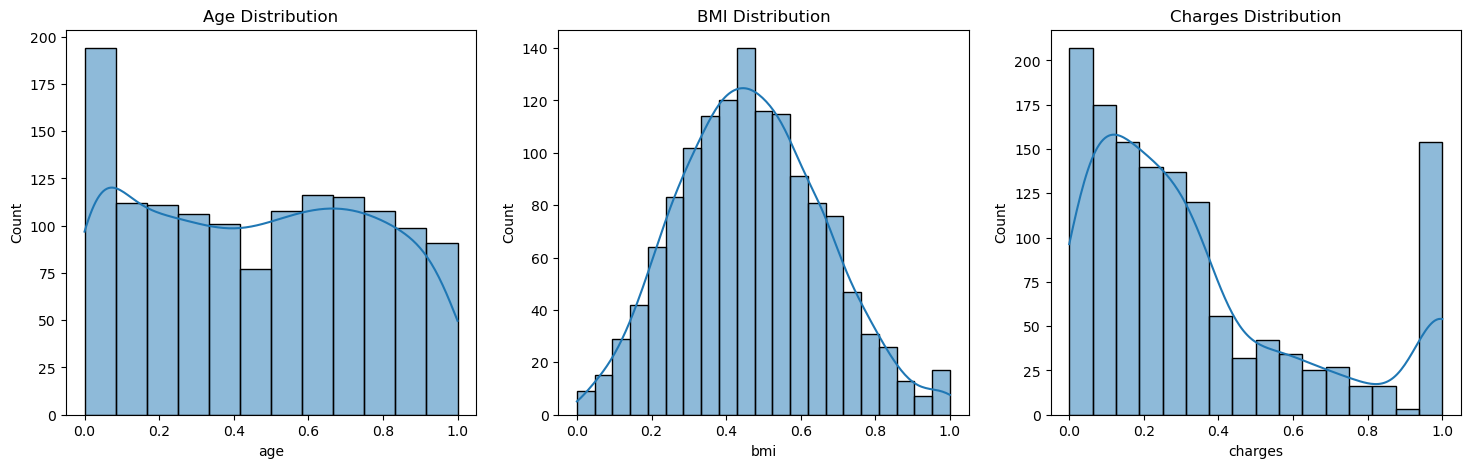

In [36]:

# EDA Steps

# 1. Analyze the distribution of key variables (age, bmi, charges)
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Distribution of 'age'
sns.histplot(insurance_df['age'], kde=True, ax=ax[0])
ax[0].set_title('Age Distribution')

# Distribution of 'bmi'
sns.histplot(insurance_df['bmi'], kde=True, ax=ax[1])
ax[1].set_title('BMI Distribution')

# Distribution of 'charges'
sns.histplot(insurance_df['charges'], kde=True, ax=ax[2])
ax[2].set_title('Charges Distribution')

plt.show()



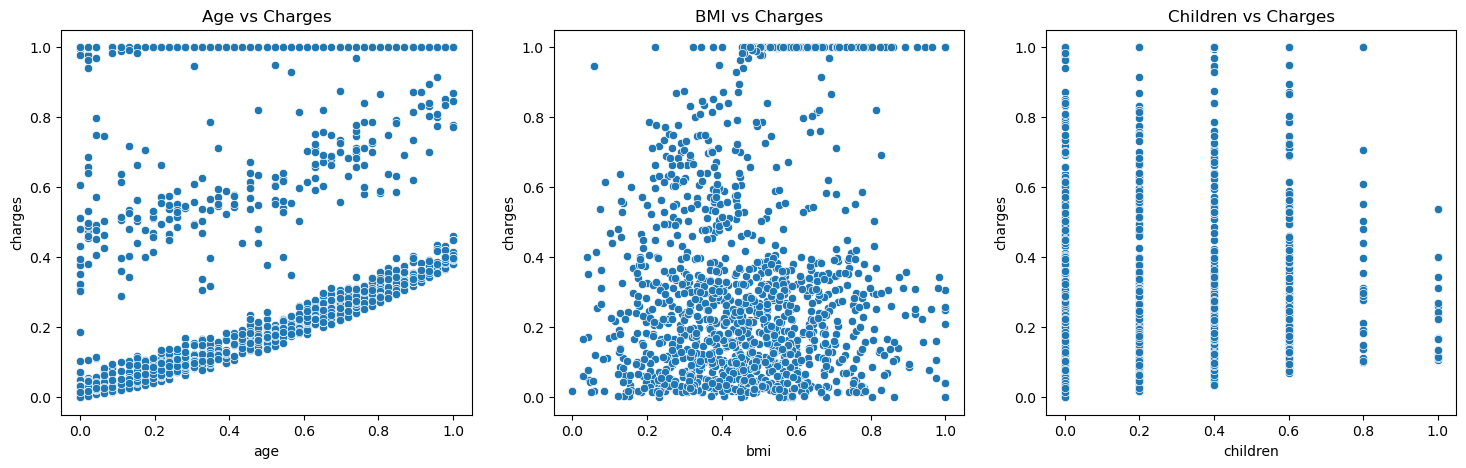

In [37]:
# 2. Investigate relationships between features and the target variable (charges)
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Relationship between 'age' and 'charges'
sns.scatterplot(x='age', y='charges', data=insurance_df, ax=ax[0])
ax[0].set_title('Age vs Charges')

# Relationship between 'bmi' and 'charges'
sns.scatterplot(x='bmi', y='charges', data=insurance_df, ax=ax[1])
ax[1].set_title('BMI vs Charges')

# Relationship between 'children' and 'charges'
sns.scatterplot(x='children', y='charges', data=insurance_df, ax=ax[2])
ax[2].set_title('Children vs Charges')

plt.show()

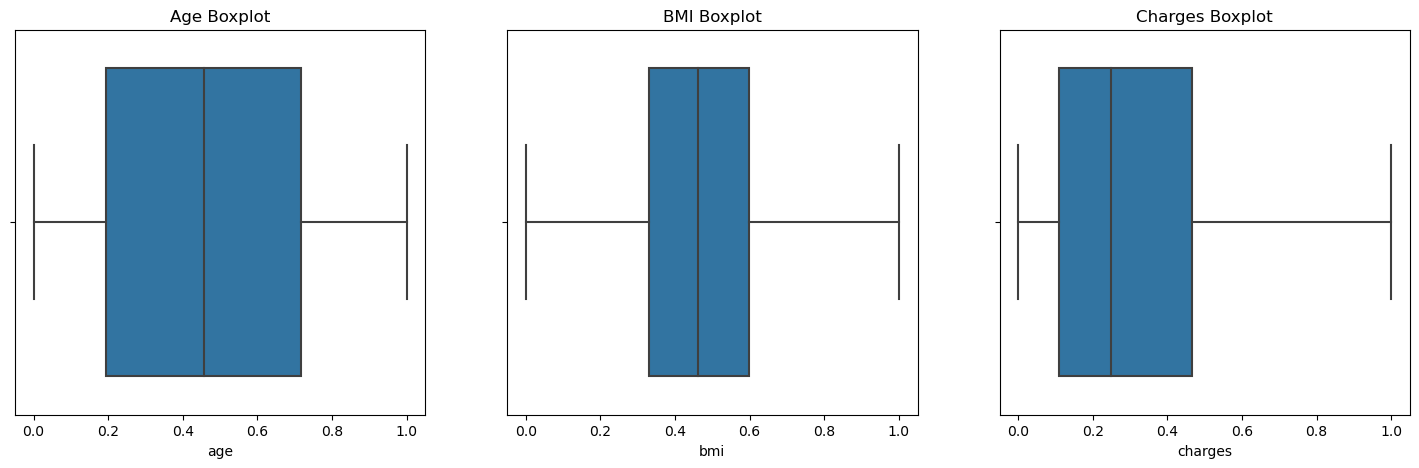

In [38]:
 #3. Identify potential outliers or influential points
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Boxplot for 'age'
sns.boxplot(x=insurance_df['age'], ax=ax[0])
ax[0].set_title('Age Boxplot')

# Boxplot for 'bmi'
sns.boxplot(x=insurance_df['bmi'], ax=ax[1])
ax[1].set_title('BMI Boxplot')

# Boxplot for 'charges'
sns.boxplot(x=insurance_df['charges'], ax=ax[2])
ax[2].set_title('Charges Boxplot')


plt.show()


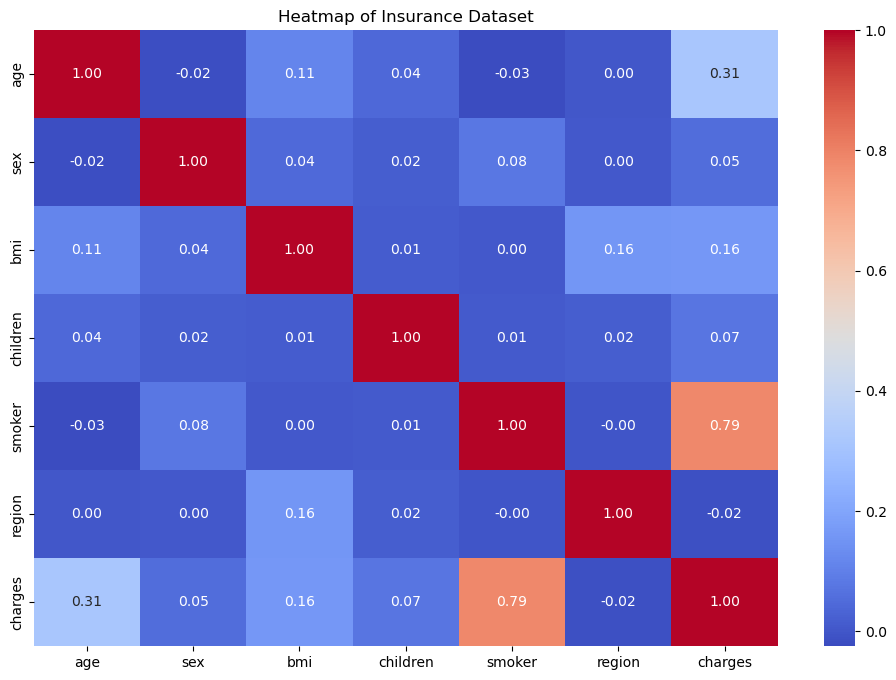

In [46]:
# Creating a heatmap to visualize the correlations between different variables in the dataset

# Calculating the correlation matrix
corr_matrix = insurance_df.corr()

# Creating the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap of Insurance Dataset")
plt.show()


In [47]:

# Preparing the dataset for linear regression model

# Defining the features and target variable
X = insurance_df.drop('charges', axis=1)
y = insurance_df['charges']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implementing a linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predicting on the test set
y_pred = linear_reg.predict(X_test)

# Evaluating model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(0.02108932083394976, 0.7837015388200166)

MSE is a measure of the average squared difference between the actual and predicted values
In our case 0.021 mse is calculated 
An R² of 0.783 indicates that approximately 78.3% of the variation in 'charges' can be explained by the model

In [48]:
# Retrieving the coefficients of the linear regression model
coefficients = linear_reg.coef_
features = X.columns

# Creating a DataFrame to display coefficients and corresponding features
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Displaying the coefficients
coef_df.sort_values(by='Coefficient', ascending=False)


,Feature,Coefficient
4,smoker,0.594463
0,age,0.312231
2,bmi,0.214115
3,children,0.057232
1,sex,-0.003842
5,region,-0.007723


1) The coefficient for smoking is 0.594 showing smoker is associated with increase in medical charges by about 0.59 units, holding all other features constant 
2) similarly age is associated with an increase in 0.31 units of medical charges, holding all other features constant
3) Similarly bmi 0.21 and children 0.05 respectively 
4) sex and region shows that they are associated with decrease in medical charges by 0.0038 and 0.00077 units 

a) the most impact comes from smoking status on medical charges 
